## Business Problem

This project is all about doing clustering countries based on some selected features such as median age, gdp per capita, life expectancy, extreme poverty level, and human development index.

You can access datasets for this clustering at: https://github.com/owid/covid-19-data/tree/master/public/data and https://en.wikipedia.org/wiki/World_Happiness_Report

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

**Loading data and Merging**

In [2]:
df = pd.read_csv('countries.csv')
df.head()

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
0,Afghanistan,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,64.83,0.498
1,Albania,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,78.57,0.785
2,Algeria,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,76.88,0.754
3,Andorra,77265,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.858
4,Angola,32866268,23.890,16.8,2.405,1.362,5819.495,NaN,61.15,0.581


In [3]:
happy_score = pd.read_csv('happiness_scores.csv')
happy_score.head()

,location,happiness_score
0,Finland,7.809
1,Denmark,7.646
2,Switzerland,7.560
3,Iceland,7.504
4,Norway,7.488


In [4]:
country = pd.merge(df, happy_score, on = 'location', how = 'left')
country.head()

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
0,Afghanistan,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,64.83,0.498,2.567
1,Albania,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,78.57,0.785,4.883
2,Algeria,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,76.88,0.754,5.005
3,Andorra,77265,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.858,NaN
4,Angola,32866268,23.890,16.8,2.405,1.362,5819.495,NaN,61.15,0.581,NaN


**Exploratory Data Analysis**

In [5]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 190 non-null    object 
 1   population               190 non-null    int64  
 2   population_density       186 non-null    float64
 3   median_age               181 non-null    float64
 4   aged_65_older            179 non-null    float64
 5   aged_70_older            180 non-null    float64
 6   gdp_per_capita           182 non-null    float64
 7   extreme_poverty          124 non-null    float64
 8   life_expectancy          189 non-null    float64
 9   human_development_index  183 non-null    float64
 10  happiness_score          149 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.8+ KB


In [6]:
def null_values(df):
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
null_values(country)

,Missing_Records,Percentage (%)
extreme_poverty,66,34.736842
happiness_score,41,21.578947
aged_65_older,11,5.789474
aged_70_older,10,5.263158
median_age,9,4.736842
gdp_per_capita,8,4.210526
human_development_index,7,3.684211
population_density,4,2.105263
life_expectancy,1,0.526316


In [7]:
country.describe().T

,count,mean,std,min,25%,50%,75%,max
population,190.0,8.183077e+07,5.819950e+08,809.000,2.367885e+06,9.493482e+06,3.076120e+07,7.794799e+09
population_density,186.0,3.416582e+02,1.612572e+03,1.980,3.597250e+01,8.246400e+01,2.081570e+02,1.934750e+04
median_age,181.0,3.020497e+01,9.171031e+00,15.100,2.170000e+01,2.940000e+01,3.870000e+01,4.820000e+01
aged_65_older,179.0,8.590022e+00,6.198639e+00,1.144,3.421500e+00,6.211000e+00,1.405300e+01,2.704900e+01
aged_70_older,180.0,5.436161e+00,4.225454e+00,0.526,2.033500e+00,3.541500e+00,8.651750e+00,1.849300e+01
gdp_per_capita,182.0,1.843971e+04,1.958909e+04,661.240,3.924303e+03,1.182214e+04,2.606905e+04,1.169356e+05
extreme_poverty,124.0,1.391613e+01,2.031197e+01,0.100,6.000000e-01,2.350000e+00,2.167500e+01,7.760000e+01
life_expectancy,189.0,7.286201e+01,7.584835e+00,53.280,6.727000e+01,7.425000e+01,7.797000e+01,8.675000e+01
human_development_index,183.0,7.088689e-01,1.544104e-01,0.354,5.885000e-01,7.360000e-01,8.230000e-01,9.530000e-01
happiness_score,149.0,5.472221e+00,1.125246e+00,2.567,4.677000e+00,5.515000e+00,6.258000e+00,7.809000e+00


**Checking out Outliers**

In [8]:
country[(country["population"] < 1000) | (country["population"] > 1000000000) | (country["population_density"] > 15000)]

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
35,China,1439323774,147.674,38.7,10.641,5.929,15308.712,0.7,76.91,0.752,5.124
76,India,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,69.66,0.640,3.573
111,Monaco,39244,19347.500,NaN,NaN,NaN,NaN,NaN,86.75,NaN,NaN
183,Vatican,809,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN,NaN
186,World,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,72.58,NaN,NaN


In [9]:
country.drop(186, axis = 0, inplace = True)

In [10]:
country[(country["gdp_per_capita"] < 1000) | (country["extreme_poverty"] > 70)]

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
27,Burundi,11890781,423.062,17.5,2.562,1.504,702.225,71.7,61.58,0.417,3.775
32,Central African Republic,4829764,7.479,18.3,3.655,2.251,661.240,NaN,53.28,0.367,3.476
44,Democratic Republic of Congo,89561404,35.879,17.0,3.020,1.745,808.133,77.1,60.68,0.457,5.194
95,Liberia,5057677,49.127,19.2,3.057,1.756,752.788,38.6,64.10,0.435,4.558
100,Madagascar,27691019,43.951,19.6,2.929,1.686,1416.440,77.6,67.04,0.519,4.166
101,Malawi,19129955,197.519,18.1,2.979,1.783,1095.042,71.4,64.26,0.477,3.538
122,Niger,24206636,16.955,15.1,2.553,1.378,926.000,44.5,62.42,0.354,4.910


**Setting Location as Index**

In [11]:
country.set_index('location', inplace = True)
country.head()

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,,,,
Afghanistan,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,64.83,0.498,2.567
Albania,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,78.57,0.785,4.883
Algeria,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,76.88,0.754,5.005
Andorra,77265,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.858,NaN
Angola,32866268,23.890,16.8,2.405,1.362,5819.495,NaN,61.15,0.581,NaN


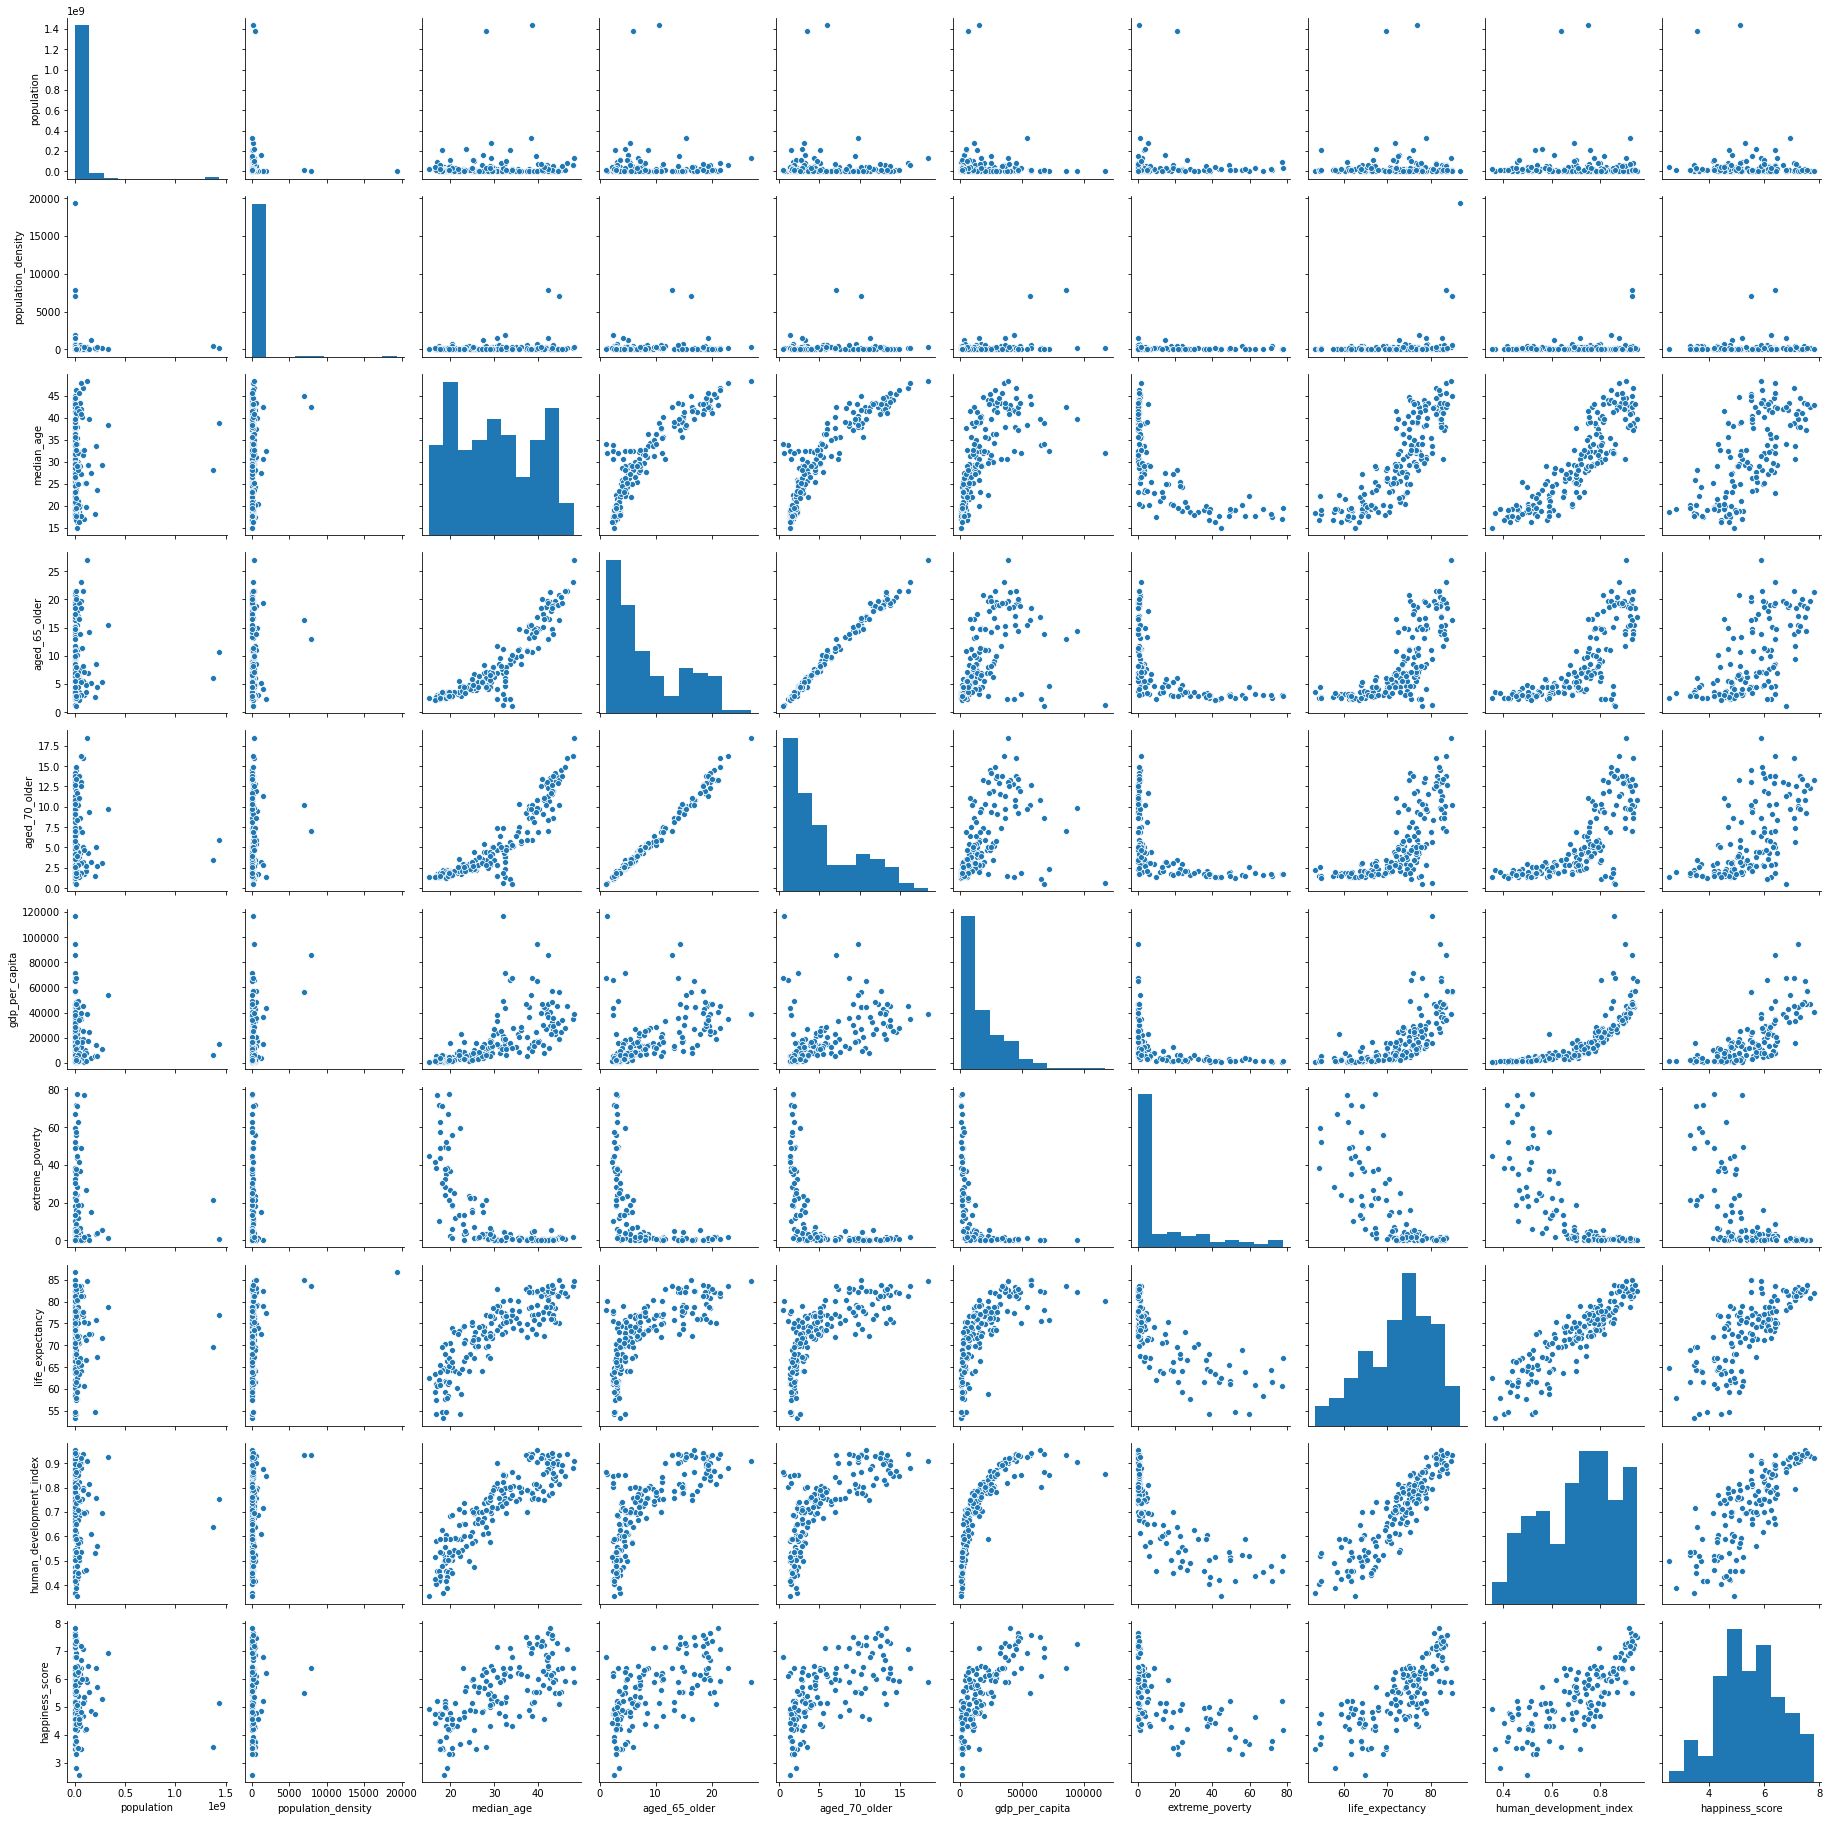

In [12]:
sns.pairplot(country);

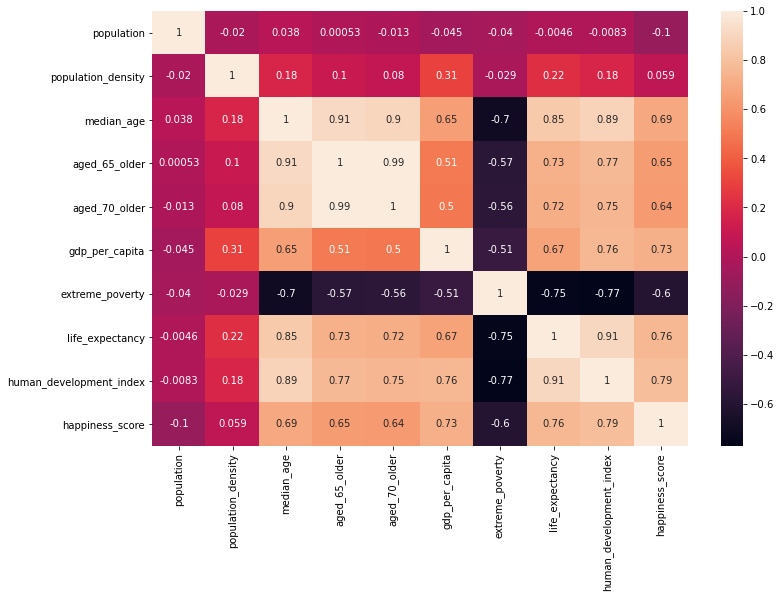

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(country.corr(), annot = True);

**Selecting Features for Clustering**

In [14]:
country_new = country[["median_age", "aged_65_older", "gdp_per_capita", "extreme_poverty", "life_expectancy", "human_development_index", "happiness_score"]]
country_new.head(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,
Afghanistan,18.6,2.581,1803.987,NaN,64.83,0.498,2.567
Albania,38.0,13.188,11803.431,1.1,78.57,0.785,4.883
Algeria,29.1,6.211,13913.839,0.5,76.88,0.754,5.005
Andorra,NaN,NaN,NaN,NaN,83.73,0.858,NaN
Angola,16.8,2.405,5819.495,NaN,61.15,0.581,NaN
Antigua and Barbuda,32.1,6.933,21490.943,NaN,77.02,0.780,NaN
Argentina,31.9,11.198,18933.907,0.6,76.67,0.825,5.975
Armenia,35.7,11.232,8787.580,1.8,75.09,0.755,4.677
Australia,37.9,15.504,44648.710,0.5,83.44,0.939,7.223


**Handling Missing Values**

In [15]:
def null_values(df):
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
null_values(country_new)

,Missing_Records,Percentage (%)
extreme_poverty,66,34.920635
happiness_score,40,21.164021
aged_65_older,11,5.820106
median_age,9,4.761905
gdp_per_capita,8,4.232804
human_development_index,6,3.174603
life_expectancy,1,0.529101


**Replacing Missing Values of Human Development Index with the Mean of HDI**

In [16]:
country_new['human_development_index'].fillna(country_new['human_development_index'].mean(), inplace=True)
country_new.isnull().sum()

median_age                  9
aged_65_older              11
gdp_per_capita              8
extreme_poverty            66
life_expectancy             1
human_development_index     0
happiness_score            40
dtype: int64

**Replacing Missing Values of Median_age, aged_65_older, life_expectancy, gdp_per_capita, extreme_poverty, and Happiness_score**

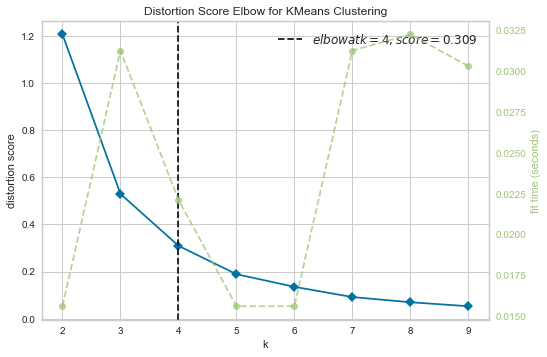

In [17]:
from sklearn.cluster import KMeans
country_hdi = country_new["human_development_index"].values.reshape(-1, 1)
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 10))
visu.fit(country_hdi)
visu.poof();

In [18]:
kmeans_model = KMeans(n_clusters=4).fit(country_hdi)
country_hdi_pred = kmeans_model.predict(country_hdi)
country_new["hdi_clusters"] = country_hdi_pred
country_new.head(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.987,NaN,64.83,0.498,2.567,2
Albania,38.0,13.188,11803.431,1.1,78.57,0.785,4.883,3
Algeria,29.1,6.211,13913.839,0.5,76.88,0.754,5.005,3
Andorra,NaN,NaN,NaN,NaN,83.73,0.858,NaN,1
Angola,16.8,2.405,5819.495,NaN,61.15,0.581,NaN,0
Antigua and Barbuda,32.1,6.933,21490.943,NaN,77.02,0.780,NaN,3
Argentina,31.9,11.198,18933.907,0.6,76.67,0.825,5.975,1
Armenia,35.7,11.232,8787.580,1.8,75.09,0.755,4.677,3
Australia,37.9,15.504,44648.710,0.5,83.44,0.939,7.223,1


In [19]:
country_new["happiness_score"] = country_new.groupby("hdi_clusters")["happiness_score"].apply(lambda x: x.fillna(x.mean()))
country_new["gdp_per_capita"] = country_new.groupby("hdi_clusters")["gdp_per_capita"].apply(lambda x: x.fillna(x.mean()))
country_new["extreme_poverty"] = country_new.groupby("hdi_clusters")["extreme_poverty"].apply(lambda x: x.fillna(x.mean()))
country_new["median_age"] = country_new.groupby("hdi_clusters")["median_age"].apply(lambda x: x.fillna(x.mean()))
country_new["aged_65_older"] = country_new.groupby("hdi_clusters")["aged_65_older"].apply(lambda x: x.fillna(x.mean()))
country_new["life_expectancy"] = country_new.groupby("hdi_clusters")["life_expectancy"].apply(lambda x: x.fillna(x.mean()))
country_new.isnull().sum()

median_age                 0
aged_65_older              0
gdp_per_capita             0
extreme_poverty            0
life_expectancy            0
human_development_index    0
happiness_score            0
hdi_clusters               0
dtype: int64

In [20]:
country_new.head()

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.600000,2.581,1803.9870,42.817857,64.83,0.498,2.567000,2
Albania,38.000000,13.188,11803.4310,1.100000,78.57,0.785,4.883000,3
Algeria,29.100000,6.211,13913.8390,0.500000,76.88,0.754,5.005000,3
Andorra,40.768182,16.032,44472.9145,0.607407,83.73,0.858,6.659643,1
Angola,16.800000,2.405,5819.4950,16.845833,61.15,0.581,5.051238,0


In [21]:
country_new.drop('hdi_clusters', axis = 1, inplace = True)
country_new.head()

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,
Afghanistan,18.600000,2.581,1803.9870,42.817857,64.83,0.498,2.567000
Albania,38.000000,13.188,11803.4310,1.100000,78.57,0.785,4.883000
Algeria,29.100000,6.211,13913.8390,0.500000,76.88,0.754,5.005000
Andorra,40.768182,16.032,44472.9145,0.607407,83.73,0.858,6.659643
Angola,16.800000,2.405,5819.4950,16.845833,61.15,0.581,5.051238


In [22]:
country_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   median_age               189 non-null    float64
 1   aged_65_older            189 non-null    float64
 2   gdp_per_capita           189 non-null    float64
 3   extreme_poverty          189 non-null    float64
 4   life_expectancy          189 non-null    float64
 5   human_development_index  189 non-null    float64
 6   happiness_score          189 non-null    float64
dtypes: float64(7)
memory usage: 16.8+ KB


## Clustering

**Scaling**

In [23]:
from sklearn.preprocessing import scale
country_new_scaled = StandardScaler().fit_transform(country_new)

**Hopkin Test**

In [24]:
from pyclustertend import hopkins
hopkins(country_new_scaled, country_new_scaled.shape[0])

0.14442209291869293

**KMeans Clustering**

**Elbow method**

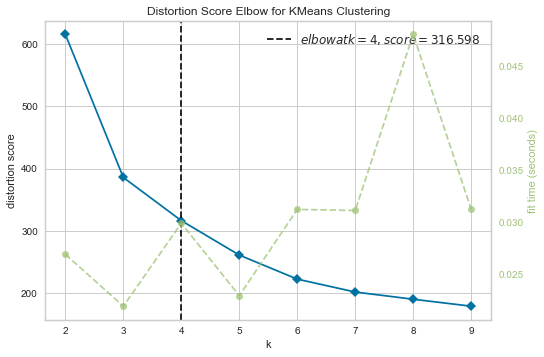

In [25]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 10))
visu.fit(scale(country_new_scaled))
visu.poof();

In [26]:
kmeans_model = KMeans(n_clusters=4, random_state=42).fit(country_new_scaled)
y_pred = kmeans_model.predict(country_new_scaled)
print(y_pred)

[0 1 1 2 3 1 1 1 2 2 1 1 1 3 1 1 2 3 0 3 3 1 3 1 2 2 0 0 3 3 2 3 0 0 1 1 1
 3 0 1 0 2 1 2 0 2 3 1 1 1 3 1 3 0 2 3 0 3 2 2 3 3 1 2 3 2 1 3 0 0 3 0 3 2
 2 2 3 3 1 3 2 2 2 1 2 3 1 0 1 1 3 3 2 1 0 0 1 2 2 2 0 0 1 1 0 2 1 3 1 1 1
 1 3 1 1 0 3 3 3 2 2 1 0 0 1 2 1 3 3 1 3 1 1 3 2 2 2 2 1 0 1 1 1 3 1 3 1 0
 1 1 0 2 2 2 3 3 3 2 0 2 1 0 1 2 2 0 1 3 0 1 3 0 1 1 1 0 1 2 2 2 1 1 3 1 1
 1 0 0 0]


In [27]:
np.unique(y_pred, return_counts = True)

(array([0, 1, 2, 3]), array([35, 66, 44, 44], dtype=int64))

**Silhoutte Score**

In [28]:
from sklearn.metrics import silhouette_score
silhouette_score(country_new_scaled, y_pred)

0.33085561897876564

In [29]:
country_new['kmeans_clusters'] = y_pred
country_new.head(15)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,kmeans_clusters
location,,,,,,,,
Afghanistan,18.600000,2.581,1803.9870,42.817857,64.83,0.498,2.567000,0
Albania,38.000000,13.188,11803.4310,1.100000,78.57,0.785,4.883000,1
Algeria,29.100000,6.211,13913.8390,0.500000,76.88,0.754,5.005000,1
Andorra,40.768182,16.032,44472.9145,0.607407,83.73,0.858,6.659643,2
Angola,16.800000,2.405,5819.4950,16.845833,61.15,0.581,5.051238,3
Antigua and Barbuda,32.100000,6.933,21490.9430,2.181818,77.02,0.780,5.446964,1
Argentina,31.900000,11.198,18933.9070,0.600000,76.67,0.825,5.975000,1
Armenia,35.700000,11.232,8787.5800,1.800000,75.09,0.755,4.677000,1
Australia,37.900000,15.504,44648.7100,0.500000,83.44,0.939,7.223000,2


## Hiearchical Clustering

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(country_new_scaled, "ward")

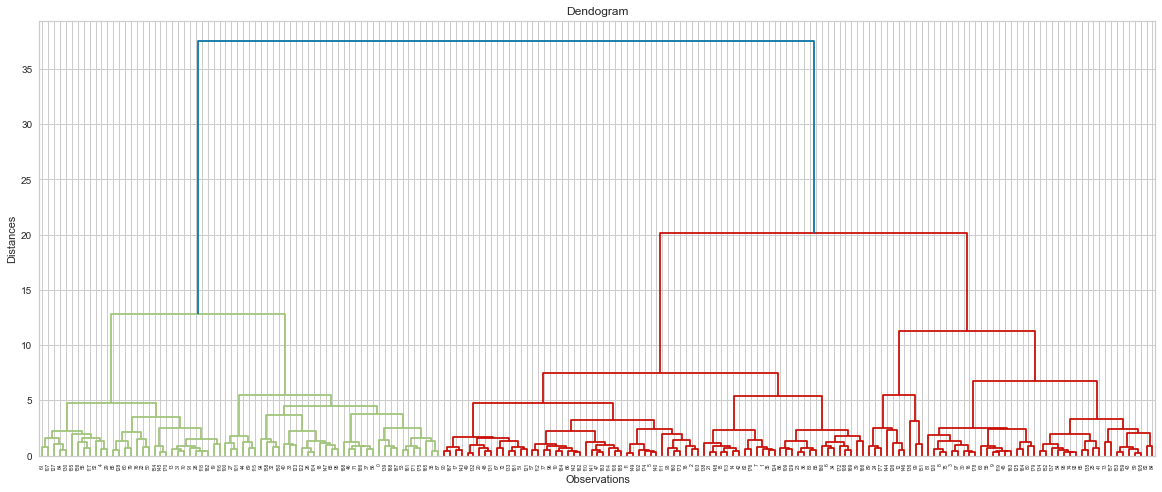

In [31]:
plt.figure(figsize = (20,8))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distances")
dendrogram(linked);

In [32]:
from sklearn.cluster import AgglomerativeClustering
hr_model = AgglomerativeClustering (n_clusters = 4)
y_pred_hr = hr_model.fit_predict(country_new_scaled)

In [33]:
clusters = hr_model.labels_

In [34]:
np.unique(y_pred_hr, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([49, 37, 72, 31], dtype=int64))

**Silhoutte Score**

In [35]:
silhouette_score(country_new_scaled, y_pred_hr)

0.31888765901414823

In [36]:
country_new['hr_clusters'] = y_pred_hr
country_new.head(15)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,kmeans_clusters,hr_clusters
location,,,,,,,,,
Afghanistan,18.600000,2.581,1803.9870,42.817857,64.83,0.498,2.567000,0,1
Albania,38.000000,13.188,11803.4310,1.100000,78.57,0.785,4.883000,1,2
Algeria,29.100000,6.211,13913.8390,0.500000,76.88,0.754,5.005000,1,2
Andorra,40.768182,16.032,44472.9145,0.607407,83.73,0.858,6.659643,2,0
Angola,16.800000,2.405,5819.4950,16.845833,61.15,0.581,5.051238,3,3
Antigua and Barbuda,32.100000,6.933,21490.9430,2.181818,77.02,0.780,5.446964,1,2
Argentina,31.900000,11.198,18933.9070,0.600000,76.67,0.825,5.975000,1,2
Armenia,35.700000,11.232,8787.5800,1.800000,75.09,0.755,4.677000,1,2
Australia,37.900000,15.504,44648.7100,0.500000,83.44,0.939,7.223000,2,0


**Comparison of Two Models**

In [37]:
pd.crosstab(country_new.kmeans_clusters, country_new.hr_clusters)

hr_clusters,0,1,2,3
kmeans_clusters,,,,
0,0,35,0,0
1,5,0,61,0
2,44,0,0,0
3,0,2,11,31


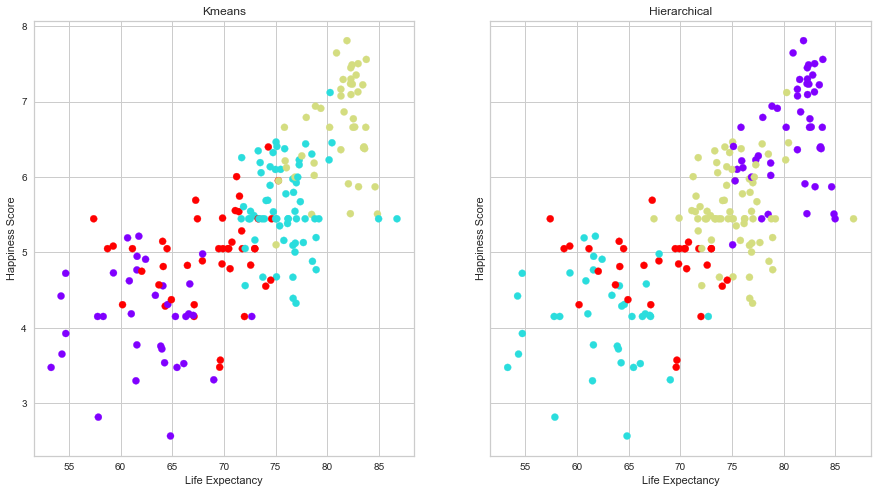

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,8))
ax1.set_title('Kmeans')
ax1.scatter(country_new.iloc[:,4], country_new.iloc[:,6], c = country_new["kmeans_clusters"], s = 50, cmap = "rainbow")
ax1.set_xlabel("Life Expectancy")
ax1.set_ylabel("Happiness Score")
ax2.set_title("Hierarchical")
ax2.scatter(country_new.iloc[:,4], country_new.iloc[:,6], c = country_new["hr_clusters"], s = 50, cmap = "rainbow")
ax2.set_xlabel("Life Expectancy")
ax2.set_ylabel("Happiness Score");

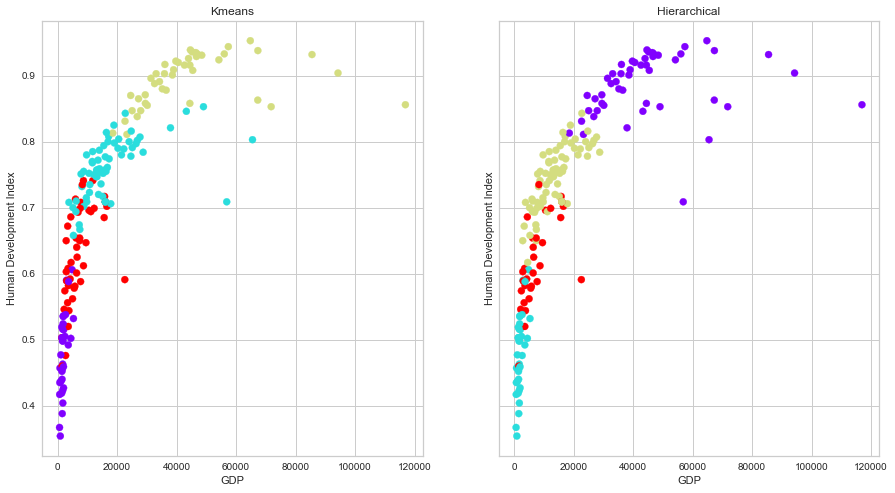

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,8))
ax1.set_title('Kmeans')
ax1.scatter(country_new.iloc[:,2], country_new.iloc[:,5], c = country_new["kmeans_clusters"], s = 50, cmap = "rainbow")
ax1.set_xlabel("GDP")
ax1.set_ylabel("Human Development Index")
ax2.set_title("Hierarchical")
ax2.scatter(country_new.iloc[:,2], country_new.iloc[:,5], c = country_new["hr_clusters"], s = 50, cmap = "rainbow")
ax2.set_xlabel("GDP")
ax2.set_ylabel("Human Development Index");

In [40]:
country_new.to_csv('Country_Comparison.csv')

<img src="Country Clustering Comparison.png" width=1000 height=800 />